After loading the data, one should get a sense of the data by exploring it and then start cleaning the data for further analysis.

In [34]:
import numpy as np
import pandas as pd
import os

In [35]:
#Reading the data
df_train = pd.read_csv('train.csv')

In [3]:
#Checking size of data (Rows,Columns)
df_train.shape

(891, 12)

In [4]:
#to check variables and their types in the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#checking first 5 rows of data to get a sense of the data
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#statistical summary; here non-numeric columns are not shown
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#summary for non_numeric columns which are of type object
categorical = df_train.dtypes[df_train.dtypes == "object"].index
print(categorical)

df_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Do I need all of the variables given in the data?

Lets's check each variable and consider whether we should keep it or not in the context of predicting survival.

Variable 'PassengerId' is just a number assigned to each passenger. So, we can remove it.

In [36]:
#removing PassengerId column from the data
del df_train['PassengerId']

We have 3 more columns to consider: Name, Ticket and Cabin. Let's explore them 1 by 1.

In [11]:
sorted(df_train['Name'])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [12]:
df_train['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

'Name' variable which has all unique values, can help in pointing out a particular row in the data. So, let's keep it. It will work as a Primary Key.

In [13]:
df_train['Ticket'][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [14]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket has 681 unique values which is almost as total number of passengers. Categorical variables which are almost equal to the records are often not very useful for prediction. We could also try to reduce the number of levels by grouping certain tickets together, but the ticket numbers don't appear to follow any logical pattern we could use for grouping. So, Let's remove it.

In [37]:
#removing Ticket column from the data
del df_train['Ticket']

In [21]:
df_train['Cabin'][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [20]:
df_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Cabin also has 147 unique values which is almost equal to total count of 204, so it may not be useful for prediction. But, the names of the levels for the cabin variable seem to have a regular structure: each starts with a capital letter followed by a number. We could use that structure to reduce the number of levels to make categories large enough that they might be useful for prediction. Let's Keep Cabin for now.

# Should I Transform Any Variables?

For example: If our data has dates in form of numbers/Strings then we might change them in date Object for better understanding. In our Train data we have 0 for Died and 1 for Survived. So, lets change them to string type from int type.

In [38]:
new_survived = pd.Categorical(df_train["Survived"])       #passing the column Survived
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by transforming Pclass into an ordered categorical variable:

In [39]:
new_Pclass = pd.Categorical(df_train["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [40]:
#over writing orinal Pclass with our new_Pclass in the data
df_train['Pclass'] = new_Pclass

In [27]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Checking Cabin Variable.

In [29]:
#checking Unique values in Cabin
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

 Now let's group them by first letter for extracting some useful information.

In [41]:
char_cabin = df_train['Cabin'].astype(str)  #Convert data to str type

new_Cabin = np.array([cabin[0] for cabin in char_cabin])  #Take first letter
#print(new_Cabin)

new_Cabin = pd.Categorical(new_Cabin)
#print(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


Let's keep the new cabin variable:

In [42]:
#over writing orinal Cabin with our new_Cabin in the data
df_train['Cabin'] = new_Cabin

In [43]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


# Are there NA Values, Outliers or Other Strange Values?

In [44]:
#example

dummy = pd.Series([1,None,3,None,7,9])
dummy.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [14]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [45]:
#here count is 714 which is fewer than the total number of records. So, it has some missing values.

missing_values = np.where(df_train['Age'].isnull() == True)
print(missing_values)

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888], dtype=int64),)


In [46]:
len(missing_values[0])

177

We have 177 missing values and it's not a good idea to throw all those records away. Below are a few ways we could deal with them:

1-Replace the null values with 0s

2-Replace the null values with some central value like the mean or median

3-Impute some other value

4-Split the data set into two parts: one set with where records have an Age value and another set where age is null.

Setting missing values in numeric data to zero makes sense in some cases, but it doesn't make any sense here because a person's age can't be zero. Setting all ages to some central number like the median is a simple fix but there's no telling whether such a central number is a reasonable estimate of age without looking at the distribution of ages. For all we know each age is equally common. We can quickly get a sense of the distribution of ages by creating a histogram of the age variable with df.hist():

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

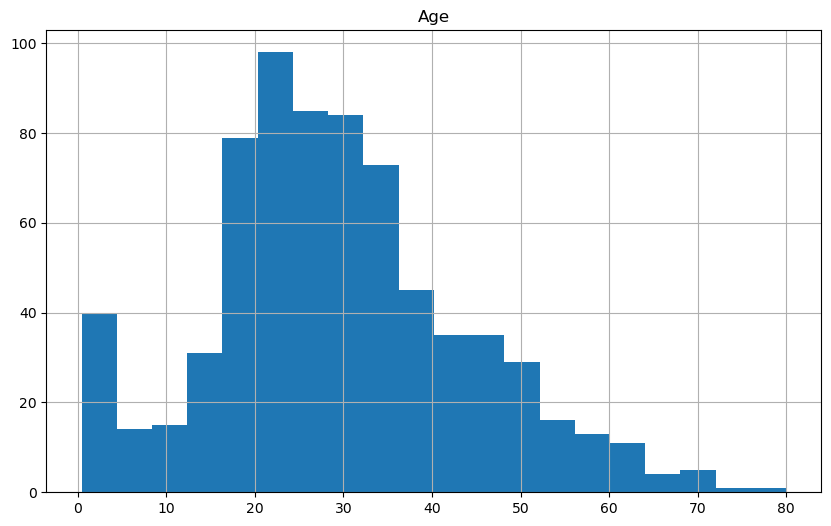

In [47]:
df_train.hist(column = 'Age',
              figsize = (10,6),
              bins = 20
             )

In [48]:
#Most common ages are between 20 and 30 so lets fill missing age values as mean or median. Here we will use median value of 28

#BEFORE COUNT WAS 714

new_age = np.where(df_train['Age'].isnull(),   #Condition: checking where value is null
                   28,                         # Print age = 28 if Condition =True
                   df_train['Age'])            # Print age as it is if Condition = False

df_train['Age'] = new_age    # setting new age values in Age column

df_train['Age'].describe()   

#AFTER COUNT IS 891

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

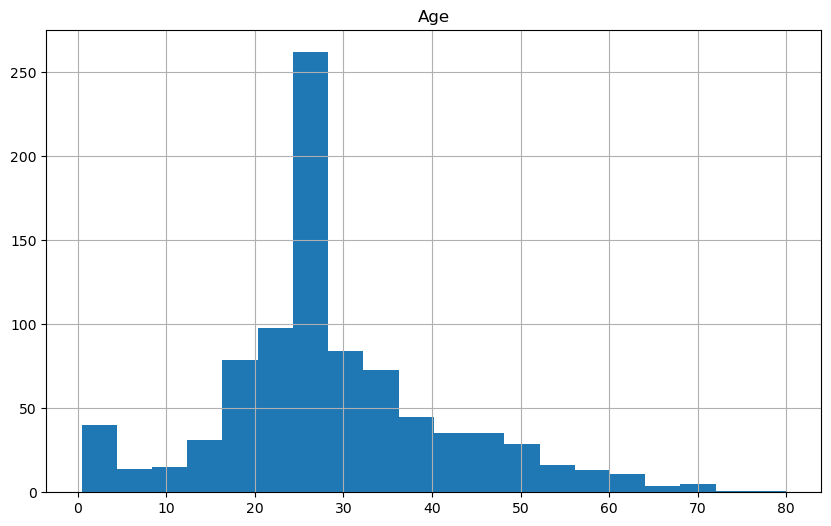

In [49]:
df_train.hist(column = 'Age',
              figsize = (10,6),
              bins = 20
             )

Next, let's consider outliers. Outliers are extreme numerical values: values that lie far away from the typical values a variable takes on. Creating plots is one of the quickest ways to detect outliers.

Now let's investigate the "Fare" variable. This time we'll use a boxplot, since boxplots are designed to show the spread of the data and help identify outliers:

<AxesSubplot:>

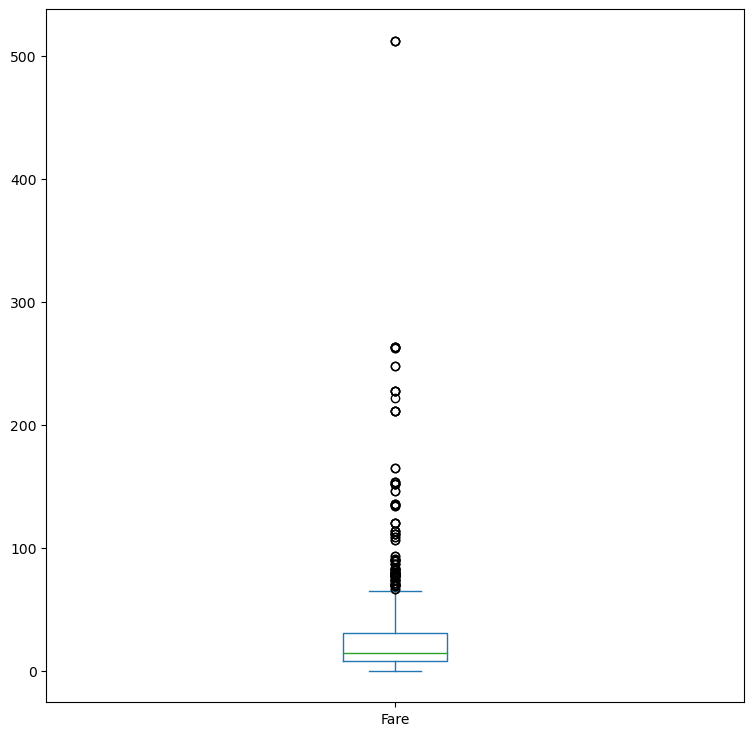

In [50]:
df_train['Fare'].plot(kind='box',
                           figsize=(9,9))

In a boxplot, the central box represents 50% of the data and the central bar represents the median. The dotted lines with bars on the ends are "whiskers" which encompass the great majority of the data and points beyond the whiskers indicate uncommon values. In this case, we have some uncommon values that are so far away from the typical value that the box appears squashed in the plot: this is a clear indication of outliers. Indeed, it looks like one passenger paid almost twice as much as any other passenger. Even the passengers that paid between 200 and 300 are far higher than the vast majority of the other passengers.

For interest's sake, let's check the name of this high roller:

In [51]:
index = np.where( df_train['Fare'] == max(df_train['Fare']) )

df_train.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


Similar to NA values, there's no single cure for outliers. You can keep them, delete them or transform them in some way to try to reduce their impact. Even if you decide to keep outliers unchanged it is still worth identifying them since they can have disproportionately large influence on your results. Let's keep the three high rollers unchanged.

# Should I Create New Variables?

Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Family, that combines SibSp and Parch to indicate the total number of family members (siblings, spouses, parents and children) a passenger has on board:

In [52]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch']

For interest's sake, let's find out who had the most family members on board:

In [53]:
most_family = np.where(df_train['Family'] == max(df_train['Family']))

df_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


There were 7 people with 8 siblings/spouses and 2 parents/children; they were probably all siblings of one another. Survived is 0 for them so all 7 of them passed away. The 8th sibling is likely in the test data for which we are supposed make predictions. Would you predict that the final sibling survived or died?

# Wrap up

Your first goal should be to explore the structure of the data to clean it and prepare the variables for your analysis.

Once your data is it the right form, you can move from exploring structure to investigating relationships between variables.

Since data cleaning and formatting is a vital and often time-consuming part of data analysis, it is important that we spend some time learning how to work with different types of data.

Over the next few lessons, we'll learn about cleaning and preprocessing text data, numeric data and dates.